Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datos

In [2]:
expuestos = pd.read_csv('https://raw.githubusercontent.com/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/BD_Expuestos.txt', sep='\t', encoding='latin-1')
sociodemograficos = pd.read_csv('https://raw.githubusercontent.com/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/BD_Sociodemograficas.txt', sep='\t', encoding='latin-1')
siniestros = pd.read_csv('https://media.githubusercontent.com/media/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/DB_Siniestros.txt', sep=',', encoding='latin-1')

#### **1. LECTURA GLOBAL**

##### **1.1. BD EXPUESTOS**

In [77]:
print(f"La base de datos contiene {expuestos.shape[0]} observaciones y {expuestos.shape[1]} variables")

La base de datos contiene 300900 observaciones y 5 variables


In [78]:
print(f"La base de datos tiene {expuestos.isnull().sum().sum()} observaciones vacias")

La base de datos tiene 148937 observaciones vacias


In [79]:
print('Las observaciones vacias se presentan en las siguientes variables:')
display(expuestos.isnull().sum())

Las observaciones vacias se presentan en las siguientes variables:


Asegurado_Id                0
Poliza_Asegurado_Id         0
FECHA_INICIO                0
FECHA_CANCELACION      148937
FECHA_FIN                   0
dtype: int64

In [80]:
print(f"La base de datos tiene {expuestos.duplicated().sum()} registros duplicados")

La base de datos tiene 0 registros duplicados


##### **1.2. BD SOCIODEMOGRAFICOS**

In [81]:
print(f"La base de datos contiene {sociodemograficos.shape[0]} observaciones y {sociodemograficos.shape[1]} variables")

La base de datos contiene 267312 observaciones y 9 variables


In [82]:
print(f"La base de datos tiene {sociodemograficos.isnull().sum().sum()} observaciones vacias")

La base de datos tiene 1 observaciones vacias


In [83]:
print('Las observaciones vacias se presentan en las siguientes variables:')
display(sociodemograficos.isnull().sum())

Las observaciones vacias se presentan en las siguientes variables:


Asegurado_Id          0
Mujer                 0
FechaNacimiento       0
Ciudad                1
CANCER                0
EPOC                  0
DIABETES              0
HIPERTENSION          0
ENF_CARDIOVASCULAR    0
dtype: int64

In [84]:
print(f"La base de datos tiene {sociodemograficos.duplicated().sum()} registros duplicados")

La base de datos tiene 0 registros duplicados


##### **1.3. BD SINIESTROS**

In [85]:
print(f"La base de datos contiene {siniestros.shape[0]} observaciones y {siniestros.shape[1]} variables")

La base de datos contiene 3308480 observaciones y 7 variables


In [86]:
print(f"La base de datos tiene {siniestros.isnull().sum().sum()} observaciones vacias")

La base de datos tiene 0 observaciones vacias


In [87]:
print(f"La base de datos tiene {siniestros.duplicated().sum()} registros duplicados")

La base de datos tiene 0 registros duplicados


#### **2. CONTEXTO DE LOS DATOS**

##### **2.1. BD EXPUESTOS**

In [88]:
display(expuestos.info())
print('\nLos registros se agrupan en los siguientes tipos:')
expuestos.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Asegurado_Id         300900 non-null  int64 
 1   Poliza_Asegurado_Id  300900 non-null  int64 
 2   FECHA_INICIO         300900 non-null  object
 3   FECHA_CANCELACION    151963 non-null  object
 4   FECHA_FIN            300900 non-null  object
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


None


Los registros se agrupan en los siguientes tipos:


object    3
int64     2
Name: count, dtype: int64

In [89]:
expuestos.select_dtypes(include='object').describe().T

,count,unique,top,freq
FECHA_INICIO,300900,730,2018/01/01,191371
FECHA_CANCELACION,151963,730,2019/12/31,68216
FECHA_FIN,300900,730,2019/12/31,217005


##### **2.2. BD SOCIODEMOGRAFICOS**

In [90]:
display(sociodemograficos.info())
print('\nLos registros se agrupan en los siguientes tipos:')
sociodemograficos.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Asegurado_Id        267312 non-null  int64 
 1   Mujer               267312 non-null  int64 
 2   FechaNacimiento     267312 non-null  object
 3   Ciudad              267311 non-null  object
 4   CANCER              267312 non-null  int64 
 5   EPOC                267312 non-null  int64 
 6   DIABETES            267312 non-null  int64 
 7   HIPERTENSION        267312 non-null  int64 
 8   ENF_CARDIOVASCULAR  267312 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 18.4+ MB


None


Los registros se agrupan en los siguientes tipos:


int64     7
object    2
Name: count, dtype: int64

In [91]:
sociodemograficos.select_dtypes(include='object').describe().T

,count,unique,top,freq
FechaNacimiento,267312,29945,25/01/1985,42
Ciudad,267311,6,Cali,127149


In [92]:
sociodemograficos.select_dtypes(include='int64').describe().T

,count,mean,std,min,25%,50%,75%,max
Asegurado_Id,267312.0,2.491157e+07,1.639717e+07,738284.0,9295646.5,24447192.0,38855063.0,58584620.0
Mujer,267312.0,5.440272e-01,4.980963e-01,-1.0,0.0,1.0,1.0,1.0
CANCER,267312.0,3.460376e-03,5.872320e-02,0.0,0.0,0.0,0.0,1.0
EPOC,267312.0,1.639657e-02,1.269952e-01,0.0,0.0,0.0,0.0,1.0
DIABETES,267312.0,6.264590e-02,2.423254e-01,0.0,0.0,0.0,0.0,1.0
HIPERTENSION,267312.0,1.323547e-02,1.142819e-01,0.0,0.0,0.0,0.0,1.0
ENF_CARDIOVASCULAR,267312.0,4.702370e-03,6.841254e-02,0.0,0.0,0.0,0.0,1.0


In [93]:
print(f"La base contiene registros de {sociodemograficos.Asegurado_Id.nunique()} usuarios")

La base contiene registros de 267233 usuarios


In [94]:
print(f"La base contiene información de con {sociodemograficos.Ciudad.nunique()} ciudades")

La base contiene información de con 6 ciudades


In [95]:
print(sociodemograficos.Ciudad.value_counts())

Ciudad
Cali               127149
Bogota              49722
Cartagena           46180
Medellin            34845
Barranquilla         9342
Sin Información        73
Name: count, dtype: int64


##### **2.3. BD SINIESTROS**

In [96]:
display(siniestros.info())
print('\nLos registros se agrupan en los siguientes tipos:')
siniestros.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308480 entries, 0 to 3308479
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Mes_Pago            int64  
 1   Asegurado_Id        int64  
 2   Reclamacion         object 
 3   Diagnostico_Codigo  object 
 4   Diagnostico_Desc    object 
 5   Eventos             int64  
 6   Valor_Pagado        float64
dtypes: float64(1), int64(3), object(3)
memory usage: 176.7+ MB


None


Los registros se agrupan en los siguientes tipos:


int64      3
object     3
float64    1
Name: count, dtype: int64

In [97]:
siniestros.select_dtypes(include='object').describe().T

,count,unique,top,freq
Reclamacion,3308480,41,CONSULTA EXTERNA,1255793
Diagnostico_Codigo,3308480,5830,9,2740383
Diagnostico_Desc,3308480,5751,DIAGNÃSTICO PENDIENTE,2740851


In [98]:
siniestros.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Mes_Pago,3308480.0,2.018590e+05,5.005354e+01,201801.0,2.018070e+05,2.019010e+05,2.019070e+05,2.019120e+05
Asegurado_Id,3308480.0,2.061855e+07,1.594818e+07,738284.0,5.756561e+06,1.660835e+07,3.379461e+07,5.858458e+07
Eventos,3308480.0,2.213185e+00,3.517578e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,2.790000e+02
Valor_Pagado,3308480.0,8.028421e+05,2.994635e+06,102000.0,4.346523e+05,4.842149e+05,6.304715e+05,1.977986e+09


In [99]:
print(f"La base contiene registros de {siniestros.Asegurado_Id.nunique()} usuarios")

La base contiene registros de 237167 usuarios


In [100]:
print(f"La base cuenta con {siniestros.Reclamacion.nunique()} tipos de reclamación")

La base cuenta con 41 tipos de reclamación


In [101]:
print(f"La base cuenta con {siniestros.Diagnostico_Codigo.nunique()} tipos de diagnostico")

La base cuenta con 5830 tipos de diagnostico


#### **3. EXPLORACIÓN DE ATRIBUTOS, PATRONES Y TENDENCIAS**

##### **3.1. BD EXPUESTOS**

IndexError: index 4 is out of bounds for axis 0 with size 3

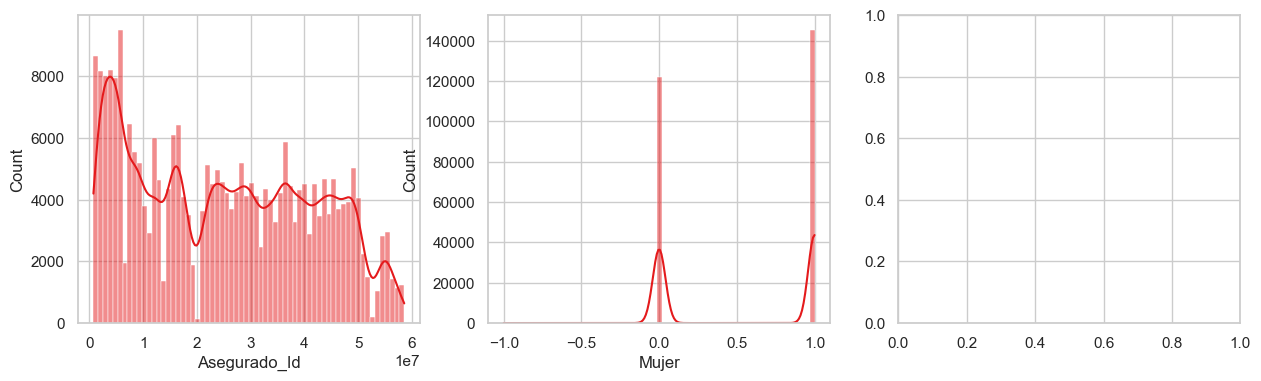

In [105]:
palette = 'Set1'
sns.set_theme(style="whitegrid", palette=palette)


fig, axs = plt.subplots(ncols=3, figsize=(15, 4))

sns.histplot(x='Asegurado_Id', data=sociodemograficos, kde=True, ax=axs[0])
sns.histplot(x='Mujer', data=sociodemograficos, kde=True, ax=axs[1])
sns.countplot(x='Ciudad', data=sociodemograficos, ax=axs[4], color=sns.color_palette(palette)[0], alpha=.55)
sns.histplot(x='CANCER', data=sociodemograficos, kde=True, ax=axs[5])
fig.suptitle('Histograma de variables numéricas ', Y=1.00)

for ax in axs: ax.set(ylabel=None)
axs[0].set(ylabel='Número de observaciones ')
axs[1].set(xlabel=None, tittle='Usuarios')
axs[1].set(xlabel=None, tittle='Genero')
axs[1].set(xlabel=None, tittle='Ciudad')
axs[1].set(xlabel=None, tittle='Padecientes de cancer');

##### **3.2. BD SOCIODEMOGRAFICOS**

##### **3.3. BD SINIESTROS**